##  Dataset Overview – `social-media-vs-productivity-extended.csv`

This dataset contains **30,000 records** detailing individual behavioral patterns and daily productivity metrics. It is designed to explore how various lifestyle factors—particularly **social media usage**, **sleep habits**, **stress**, and **screen time**—impact actual productivity. The goal is to build predictive models that quantify and explain this relationship.

---

### Feature Summary

| Feature Name                      | Description                                                                 |
|-----------------------------------|-----------------------------------------------------------------------------|
| `age`                             | Age of the individual (in years)                                            |
| `gender`                          | Gender identity (e.g., Male, Female)                                        |
| `job_type`                        | Employment type (e.g., IT, Finance, Unemployed)                             |
| `daily_social_media_time`         | Average daily time spent on social media (in hours)                         |
| `social_platform_preference`      | Most used social platform (e.g., Instagram, Facebook, X)                    |
| `number_of_notifications`         | Mobile notifications received per day                                       |
| `work_hours_per_day`              | Average work hours per day                                                  |
| `perceived_productivity_score`    | Self-rated productivity on a 1–10 scale                                     |
| `actual_productivity_score`       | Objective productivity score (1–10) — **Target variable (Y)**               |
| `stress_level`                    | Self-reported stress level (1–10)                                           |
| `sleep_hours`                     | Number of Sleeping Hours                                           |
| `screen_time_before_sleep`        | Screen time exposure before sleeping (in hours)                             |
| `breaks_during_work`              | Number of breaks taken during work hours                                    |
| `uses_focus_apps`                 | Whether user employs focus-enhancing apps (True/False)                      |
| `has_digital_wellbeing_enabled`   | Whether digital wellbeing tools are active (True/False)                     |
| `coffee_consumption_per_day`      | Average cups of coffee consumed daily                                       |
| `days_feeling_burnout_per_month`  | Number of days feeling burned out per month                                 |
| `weekly_offline_hours`            | Total weekly hours spent completely offline                                 |
| `job_satisfaction_score`          | Satisfaction with job (scale: 1–10)                                         |
| `internet_speed`                  | Internet speed (0-1)                            |
| `noise_level_during_work`         | Perceived noise level while working (e.g., Low, Medium, High)              |

---
**Note**: Additional engineered features like `productivity_gap`, `screen_sleep_ratio`, `offline_ratio` , `connectivity_stress_score`, and `work_distraction`were created during preprocessing to enhance model performance.


# Step 1: Data Cleaning & Imputation

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import warnings
warnings.filterwarnings('ignore')
import numpy as np  # Linear algebra 
import pandas as pd  # Data processing & manipulation — read, clean, analyze CSVs
from sklearn.impute import SimpleImputer  # Auto-filling missing values smartly
import matplotlib.pyplot as plt  # Classic plotting — charts, lines, bar graphs
import seaborn as sns  # Advanced visual styling — heatmaps, distributions, insights
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import SVR
import time
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization , LeakyReLU,Input
from tensorflow.keras.callbacks import EarlyStopping

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

2025-06-28 16:46:55.127182: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751129215.438126      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751129215.524839      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


/kaggle/input/social-media-vs-productivity-extended/social_media_vs_productivity.csv


## Load dataset

In [2]:
data=pd.read_csv('/kaggle/input/social-media-vs-productivity-extended/social_media_vs_productivity.csv')

In [3]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.head()

age  gender    job_type  daily_social_media_time  \
0   56    Male  Unemployed                 4.180940   
1   46    Male      Health                 3.249603   
2   32    Male     Finance                      NaN   
3   60  Female  Unemployed                      NaN   
4   25    Male          IT                      NaN   

  social_platform_preference  number_of_notifications  work_hours_per_day  \
0                   Facebook                       61            6.753558   
1                    Twitter                       59            9.169296   
2                    Twitter                       57            7.910952   
3                   Facebook                       59            6.355027   
4                   Telegram                       66            6.214096   

   perceived_productivity_score  actual_productivity_score  stress_level  ...  \
0                      8.040464                   7.291555           4.0  ...   
1                      5.063368                   5.165093           7.0  ...   
2                      3.861762                   3.474053           4.0  ...   
3                      2.916331                   1.774869           6.0  ...   
4                      8.868753                        NaN           7.0  ...   

   screen_time_before_sleep  breaks_during_work  uses_focus_apps  \
0                  0.419102                   8            False   
1                  0.671519                   7             True   
2                  0.624378                   0             True   
3                  1.204540                   1            False   
4                  1.876254                   1            False   

   has_digital_wellbeing_enabled  coffee_consumption_per_day  \
0                          False                           4   
1                           True                           2   
2                          False                           3   
3                          False                           0   
4                           True                           1   

   days_feeling_burnout_per_month  weekly_offline_hours  \
0                              11             21.927072   
1                              25              0.000000   
2                              17             10.322044   
3                               4             23.876616   
4                              30             10.653519   

   job_satisfaction_score  internet_speed  noise_level_during_work  
0                6.336688        0.322988                      Low  
1                3.412427        0.512681                   Medium  
2                2.474944        0.110751                      Low  
3                1.733670        0.765121                      Low  
4                9.693060        0.075965                      Low  

[5 rows x 21 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             30000 non-null  int64  
 1   gender                          30000 non-null  object 
 2   job_type                        30000 non-null  object 
 3   daily_social_media_time         27235 non-null  float64
 4   social_platform_preference      30000 non-null  object 
 5   number_of_notifications         30000 non-null  int64  
 6   work_hours_per_day              30000 non-null  float64
 7   perceived_productivity_score    28386 non-null  float64
 8   actual_productivity_score       27635 non-null  float64
 9   stress_level                    28096 non-null  float64
 10  sleep_hours                     27402 non-null  float64
 11  screen_time_before_sleep        27789 non-null  float64
 12  breaks_during_work              

In [5]:
data.isnull().sum()

age                                  0
gender                               0
job_type                             0
daily_social_media_time           2765
social_platform_preference           0
number_of_notifications              0
work_hours_per_day                   0
perceived_productivity_score      1614
actual_productivity_score         2365
stress_level                      1904
sleep_hours                       2598
screen_time_before_sleep          2211
breaks_during_work                   0
uses_focus_apps                      0
has_digital_wellbeing_enabled        0
coffee_consumption_per_day           0
days_feeling_burnout_per_month       0
weekly_offline_hours                 0
job_satisfaction_score            2730
internet_speed                       0
noise_level_during_work              0
dtype: int64

## Manual Filling with Mean and Median 

In [6]:
""""data['daily_social_media_time'].fillna(data['daily_social_media_time'].mean(), inplace=True)
data['perceived_productivity_score'].fillna(data['perceived_productivity_score'].mean(), inplace=True)
data['actual_productivity_score'].fillna(data['actual_productivity_score'].mean(), inplace=True)
data['stress_level'].fillna(data['stress_level'].mean(), inplace=True)
data['screen_time_before_sleep'].fillna(data['screen_time_before_sleep'].median(), inplace=True)
data['sleep_hours'].fillna(data['sleep_hours'].median(), inplace=True)
data['job_satisfaction_score'].fillna(data['job_satisfaction_score'].mean(), inplace=True)"""


'"data[\'daily_social_media_time\'].fillna(data[\'daily_social_media_time\'].mean(), inplace=True)\ndata[\'perceived_productivity_score\'].fillna(data[\'perceived_productivity_score\'].mean(), inplace=True)\ndata[\'actual_productivity_score\'].fillna(data[\'actual_productivity_score\'].mean(), inplace=True)\ndata[\'stress_level\'].fillna(data[\'stress_level\'].mean(), inplace=True)\ndata[\'screen_time_before_sleep\'].fillna(data[\'screen_time_before_sleep\'].median(), inplace=True)\ndata[\'sleep_hours\'].fillna(data[\'sleep_hours\'].median(), inplace=True)\ndata[\'job_satisfaction_score\'].fillna(data[\'job_satisfaction_score\'].mean(), inplace=True)'

## Separate numeric and categorical columns

In [7]:
numeric_columns=data.select_dtypes(include=['float','int64']).columns
numeric_columns

Index(['age', 'daily_social_media_time', 'number_of_notifications',
       'work_hours_per_day', 'perceived_productivity_score',
       'actual_productivity_score', 'stress_level', 'sleep_hours',
       'screen_time_before_sleep', 'breaks_during_work',
       'coffee_consumption_per_day', 'days_feeling_burnout_per_month',
       'weekly_offline_hours', 'job_satisfaction_score', 'internet_speed'],
      dtype='object')

In [8]:
non_numeric_cols=data.select_dtypes(include=['object','bool']).columns
non_numeric_cols

Index(['gender', 'job_type', 'social_platform_preference', 'uses_focus_apps',
       'has_digital_wellbeing_enabled', 'noise_level_during_work'],
      dtype='object')

## Fill Numeric missing values with mean

In [9]:
mean_imputer=SimpleImputer(strategy='mean')
data[numeric_columns]=mean_imputer.fit_transform(data[numeric_columns])

## Fill NoN-Numeric missing values with mean

In [10]:
mode_imputer=SimpleImputer(strategy='most_frequent')
data[non_numeric_cols]=mode_imputer.fit_transform(data[non_numeric_cols])

## Check if all missing values are handled

In [11]:
data.isnull().sum()

age                               0
gender                            0
job_type                          0
daily_social_media_time           0
social_platform_preference        0
number_of_notifications           0
work_hours_per_day                0
perceived_productivity_score      0
actual_productivity_score         0
stress_level                      0
sleep_hours                       0
screen_time_before_sleep          0
breaks_during_work                0
uses_focus_apps                   0
has_digital_wellbeing_enabled     0
coffee_consumption_per_day        0
days_feeling_burnout_per_month    0
weekly_offline_hours              0
job_satisfaction_score            0
internet_speed                    0
noise_level_during_work           0
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             30000 non-null  float64
 1   gender                          30000 non-null  object 
 2   job_type                        30000 non-null  object 
 3   daily_social_media_time         30000 non-null  float64
 4   social_platform_preference      30000 non-null  object 
 5   number_of_notifications         30000 non-null  float64
 6   work_hours_per_day              30000 non-null  float64
 7   perceived_productivity_score    30000 non-null  float64
 8   actual_productivity_score       30000 non-null  float64
 9   stress_level                    30000 non-null  float64
 10  sleep_hours                     30000 non-null  float64
 11  screen_time_before_sleep        30000 non-null  float64
 12  breaks_during_work              

In [13]:
data.describe()

age  daily_social_media_time  number_of_notifications  \
count  30000.000000             30000.000000             30000.000000   
mean      41.486867                 3.113418                59.958767   
std       13.835221                 1.976884                 7.723772   
min       18.000000                 0.000000                30.000000   
25%       30.000000                 1.797748                55.000000   
50%       41.000000                 3.113418                60.000000   
75%       53.000000                 4.219533                65.000000   
max       65.000000                17.973256                90.000000   

       work_hours_per_day  perceived_productivity_score  \
count        30000.000000                  30000.000000   
mean             6.990792                      5.510488   
std              1.997736                      1.968285   
min              0.000000                      2.000252   
25%              5.643771                      3.858604   
50%              6.990641                      5.510488   
75%              8.354725                      7.168062   
max             12.000000                      8.999376   

       actual_productivity_score  stress_level   sleep_hours  \
count               30000.000000  30000.000000  30000.000000   
mean                    4.951805      5.514059      6.500247   
std                     1.807615      2.773891      1.399175   
min                     0.296812      1.000000      3.000000   
25%                     3.509336      3.000000      5.598942   
50%                     4.951805      5.514059      6.500247   
75%                     6.396285      8.000000      7.398974   
max                     9.846258     10.000000     10.000000   

       screen_time_before_sleep  breaks_during_work  \
count              30000.000000        30000.000000   
mean                   1.025568            4.992200   
std                    0.628817            3.173737   
min                    0.000000            0.000000   
25%                    0.569569            2.000000   
50%                    1.025568            5.000000   
75%                    1.435798            8.000000   
max                    3.000000           10.000000   

       coffee_consumption_per_day  days_feeling_burnout_per_month  \
count                30000.000000                    30000.000000   
mean                     1.999300                       15.557067   
std                      1.410047                        9.252956   
min                      0.000000                        0.000000   
25%                      1.000000                        8.000000   
50%                      2.000000                       16.000000   
75%                      3.000000                       24.000000   
max                     10.000000                       31.000000   

       weekly_offline_hours  job_satisfaction_score  internet_speed  
count          30000.000000            30000.000000    30000.000000  
mean              10.360655                4.964901        0.499839  
std                7.280415                2.022374        0.288330  
min                0.000000                0.000000        0.000026  
25%                4.541872                3.528486        0.250439  
50%               10.013677                4.964901        0.500024  
75%               15.300809                6.407090        0.747402  
max               40.964769               10.000000        0.999991

In [14]:
data.head()

age  gender    job_type  daily_social_media_time  \
0  56.0    Male  Unemployed                 4.180940   
1  46.0    Male      Health                 3.249603   
2  32.0    Male     Finance                 3.113418   
3  60.0  Female  Unemployed                 3.113418   
4  25.0    Male          IT                 3.113418   

  social_platform_preference  number_of_notifications  work_hours_per_day  \
0                   Facebook                     61.0            6.753558   
1                    Twitter                     59.0            9.169296   
2                    Twitter                     57.0            7.910952   
3                   Facebook                     59.0            6.355027   
4                   Telegram                     66.0            6.214096   

   perceived_productivity_score  actual_productivity_score  stress_level  ...  \
0                      8.040464                   7.291555           4.0  ...   
1                      5.063368                   5.165093           7.0  ...   
2                      3.861762                   3.474053           4.0  ...   
3                      2.916331                   1.774869           6.0  ...   
4                      8.868753                   4.951805           7.0  ...   

   screen_time_before_sleep  breaks_during_work  uses_focus_apps  \
0                  0.419102                 8.0            False   
1                  0.671519                 7.0             True   
2                  0.624378                 0.0             True   
3                  1.204540                 1.0            False   
4                  1.876254                 1.0            False   

  has_digital_wellbeing_enabled coffee_consumption_per_day  \
0                         False                        4.0   
1                          True                        2.0   
2                         False                        3.0   
3                         False                        0.0   
4                          True                        1.0   

   days_feeling_burnout_per_month  weekly_offline_hours  \
0                            11.0             21.927072   
1                            25.0              0.000000   
2                            17.0             10.322044   
3                             4.0             23.876616   
4                            30.0             10.653519   

   job_satisfaction_score  internet_speed  noise_level_during_work  
0                6.336688        0.322988                      Low  
1                3.412427        0.512681                   Medium  
2                2.474944        0.110751                      Low  
3                1.733670        0.765121                      Low  
4                9.693060        0.075965                      Low  

[5 rows x 21 columns]

# Step 2: Exploratory Data Analysis (EDA)

In [15]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams["font.size"] = 14
plt.rcParams["axes.titlesize"] = 16
plt.rcParams["axes.labelsize"] = 14
plt.rcParams["grid.alpha"] = 0.7 

## 1. Distribution of Daily Social Media Time with Density & KDE

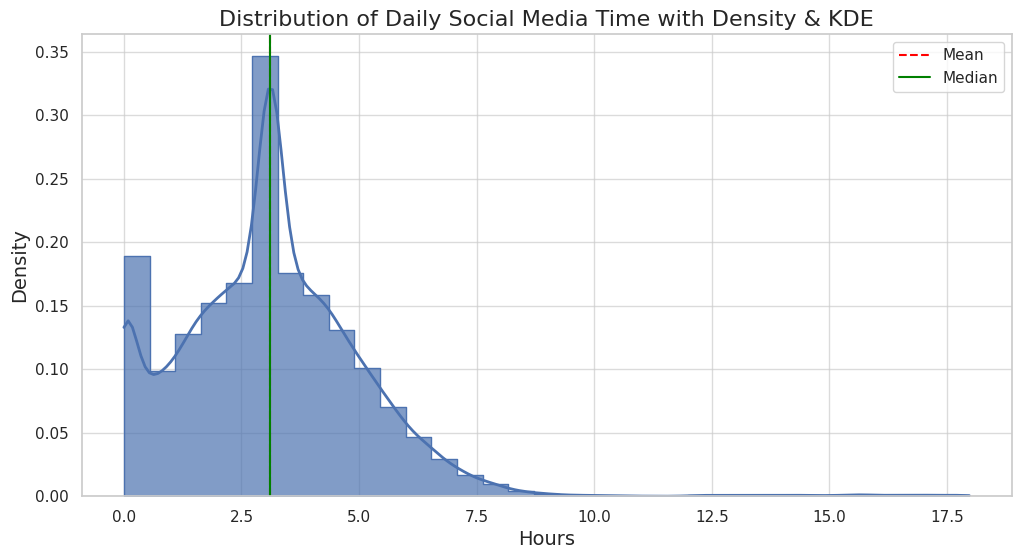

In [16]:
sns.histplot(
    data["daily_social_media_time"], 
    bins=33, 
    kde=True,        
    stat='density',                 
    alpha=0.7,                     
    line_kws={'linewidth': 2},    
    element='step',                
    fill=True                     
)
plt.title("Distribution of Daily Social Media Time with Density & KDE")
plt.xlabel("Hours")
plt.ylabel("Density")
plt.axvline(data["daily_social_media_time"].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(data["daily_social_media_time"].median(), color='green', linestyle='-', label='Median')
plt.legend()
plt.show()


## 2. Average Actual Productivity Score by Platform

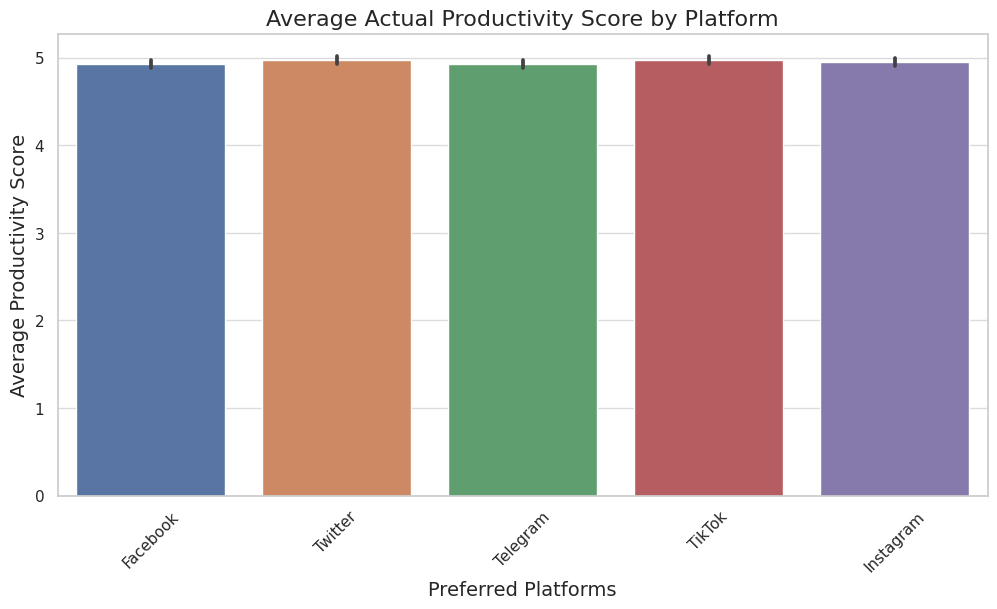

In [17]:
sns.barplot(data=data, x="social_platform_preference", y="actual_productivity_score", estimator='mean')
plt.title("Average Actual Productivity Score by Platform")
plt.xticks(rotation=45)
plt.xlabel("Preferred Platforms")
plt.ylabel("Average Productivity Score")
plt.show()

## 3. Actual Productivity Score by Gender

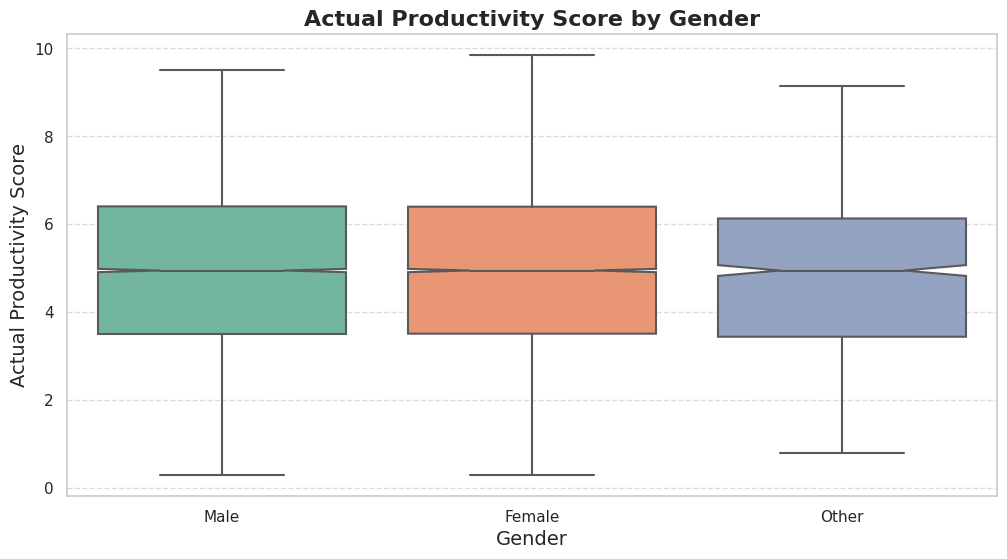

In [18]:
sns.boxplot(data=data, x="gender", y="actual_productivity_score", palette="Set2", notch=True)
plt.title("Actual Productivity Score by Gender", weight='bold')
plt.xlabel("Gender")
plt.ylabel("Actual Productivity Score", )
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## 4.Social Media Time vs. Actual Productivity 

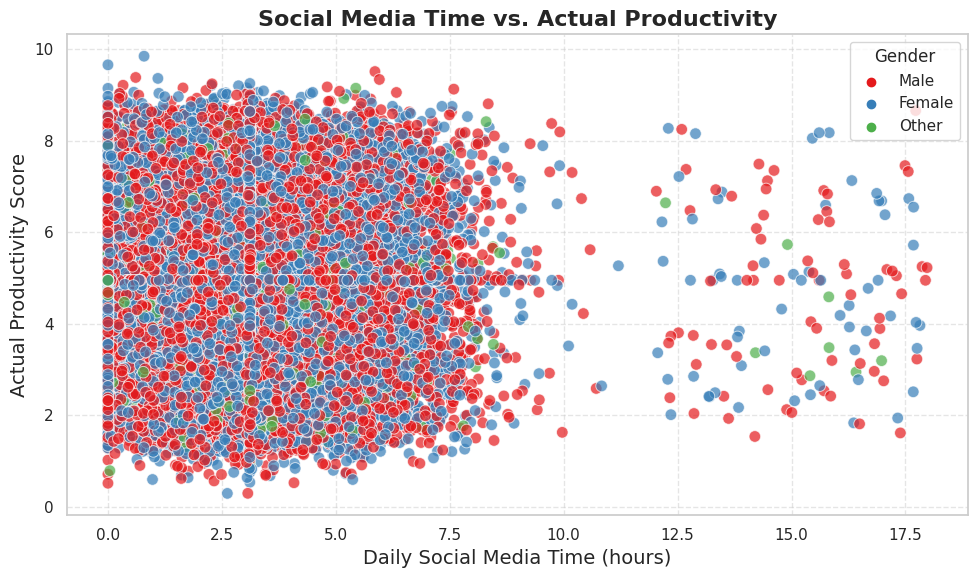

In [19]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x="daily_social_media_time", y="actual_productivity_score", 
                hue="gender", alpha=0.7, palette="Set1", edgecolor='w', s=70)
plt.title("Social Media Time vs. Actual Productivity",weight='bold')
plt.xlabel("Daily Social Media Time (hours)")
plt.ylabel("Actual Productivity Score")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


## 5. Stress Level vs. Actual Productivity (Scatter Plot)

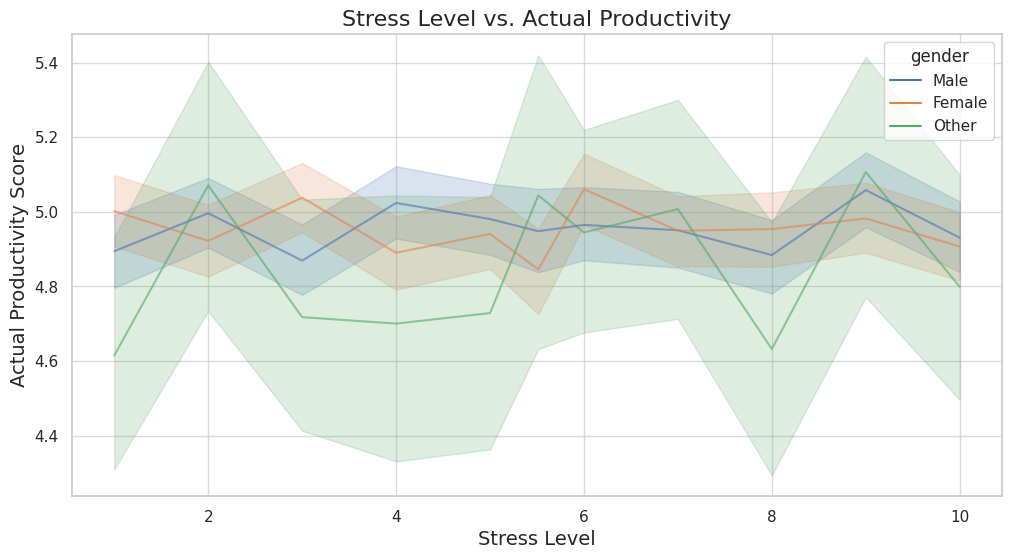

In [20]:
sns.lineplot(data=data, x="stress_level", y="actual_productivity_score", hue="gender", alpha=0.6)
plt.title("Stress Level vs. Actual Productivity")
plt.xlabel("Stress Level")
plt.ylabel("Actual Productivity Score")
plt.show()

## 6. Sleep Hours vs. Actual Productivity (Scatter Plot)

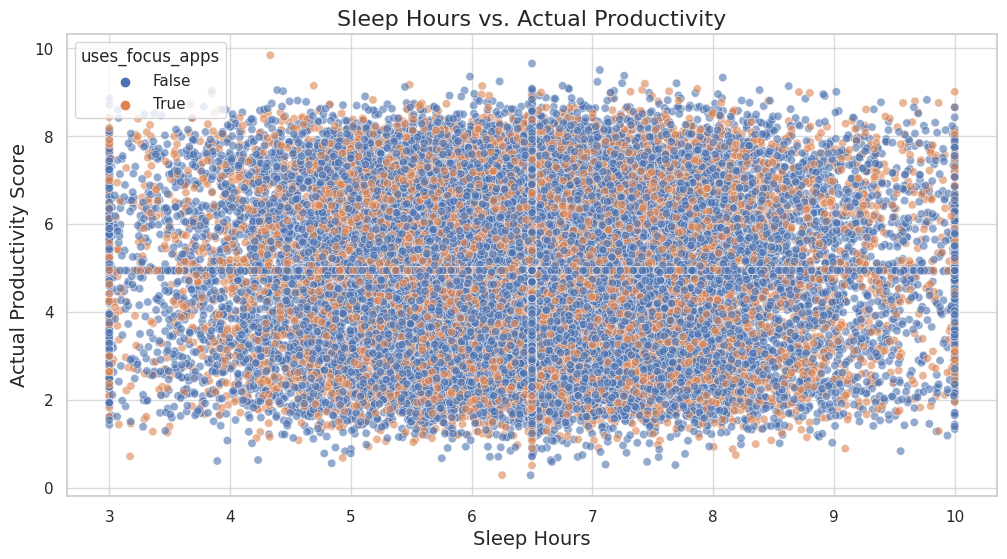

In [21]:
sns.scatterplot(data=data, x="sleep_hours", y="actual_productivity_score", hue="uses_focus_apps", alpha=0.6)
plt.title("Sleep Hours vs. Actual Productivity")
plt.xlabel("Sleep Hours")
plt.ylabel("Actual Productivity Score")
plt.show()

## 7. Correlation Heatmap (Only wrt Numeric Features{float,int})

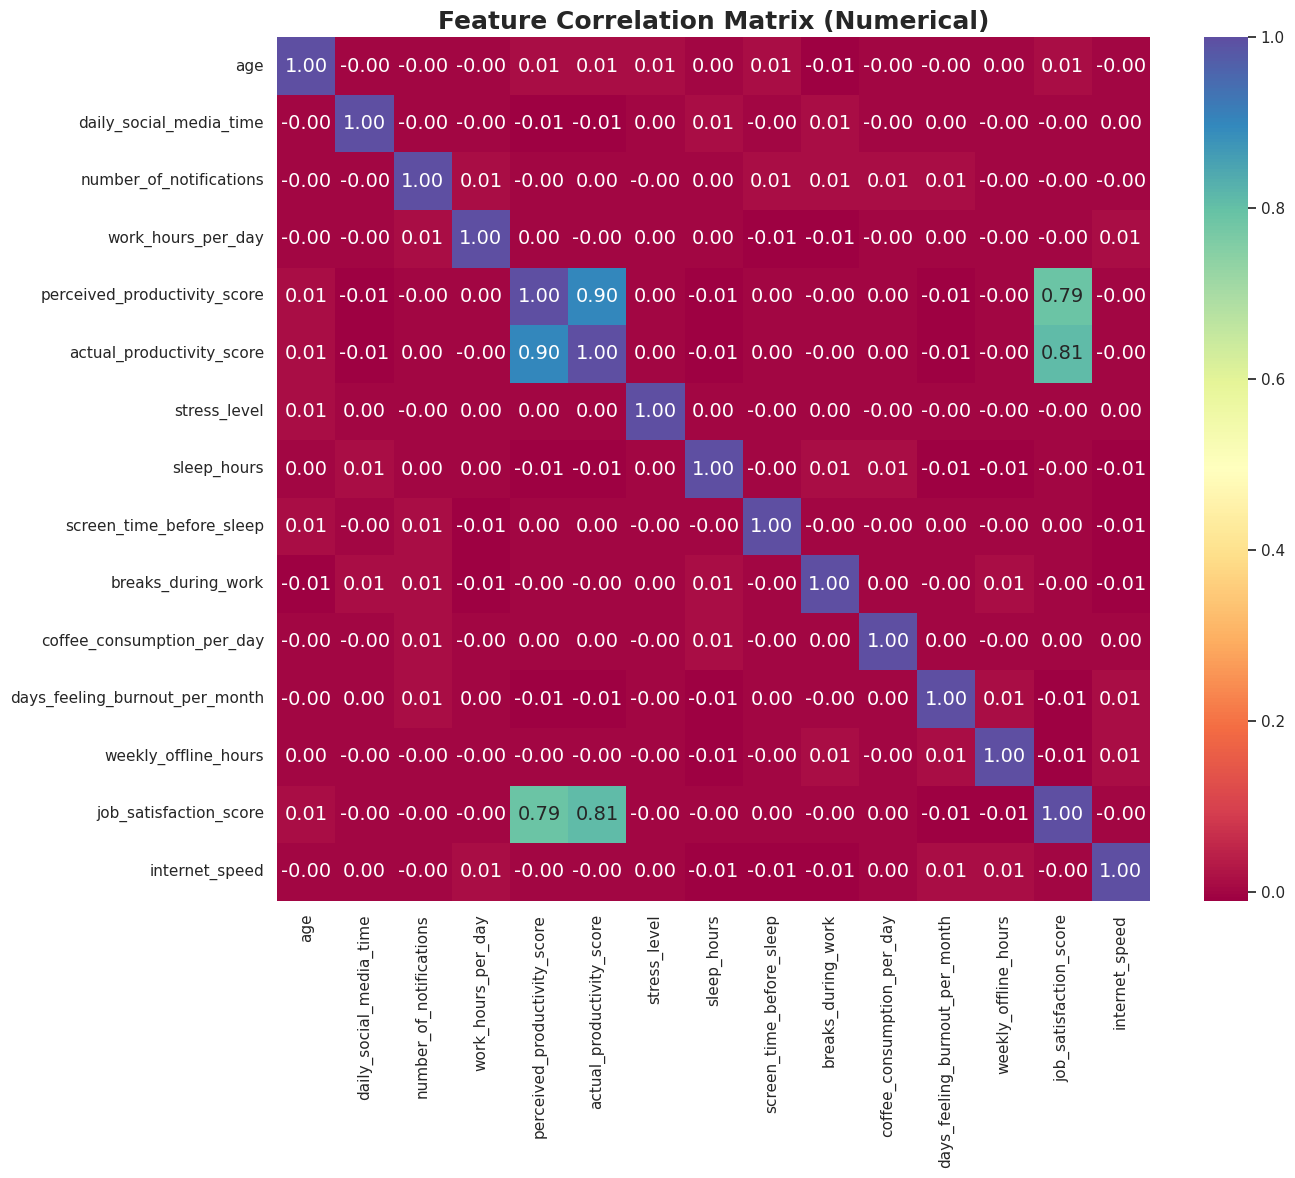

In [22]:
plt.figure(figsize=(14, 12))
corr_matrix = data.select_dtypes(include=["float64", "int64"]).corr().round(2)
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="Spectral"
)
plt.title("Feature Correlation Matrix (Numerical)", fontsize=18, fontweight='bold')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


## 8. Work Hours vs. Actual Productivity

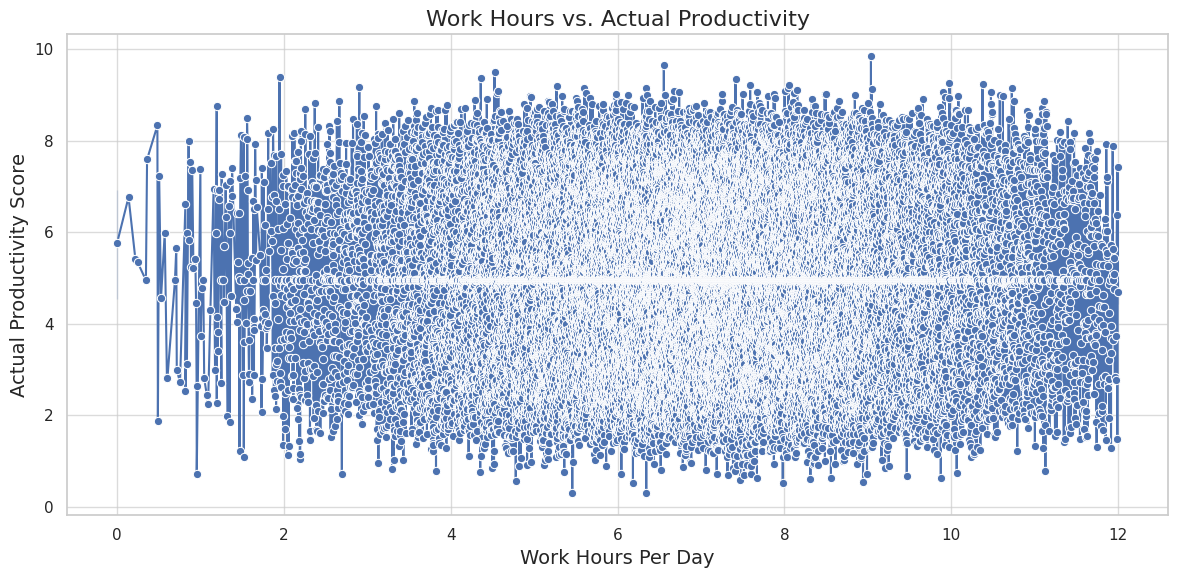

In [23]:
sns.lineplot(
    data=data, 
    x="work_hours_per_day", 
    y="actual_productivity_score", 
    marker="o"
)
plt.title("Work Hours vs. Actual Productivity")
plt.xlabel("Work Hours Per Day", )
plt.ylabel("Actual Productivity Score",)
plt.tight_layout()
plt.show()


## 9. Sleep Hours vs. Actual Productivity (line plot)

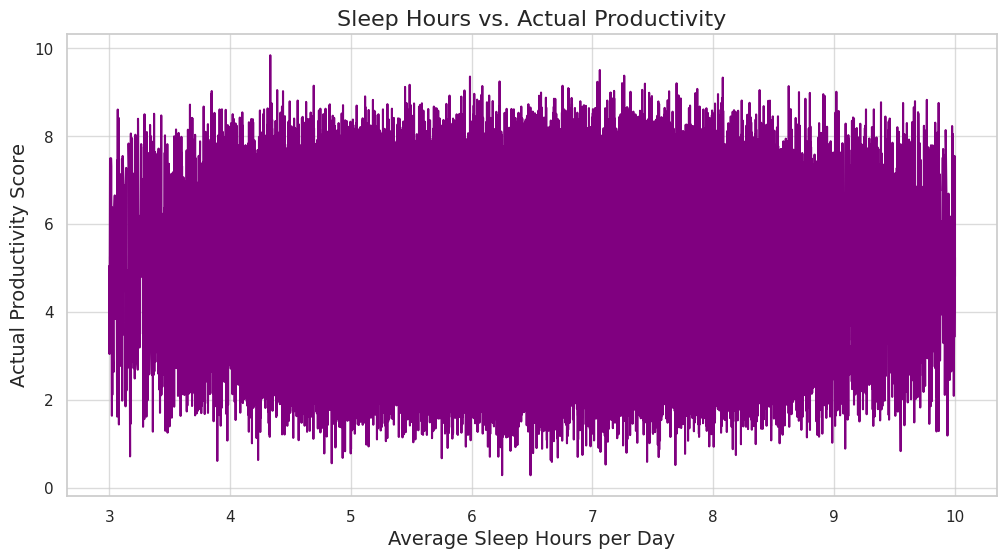

In [24]:
sns.lineplot(
    data=data,
    x="sleep_hours",
    y="actual_productivity_score",
    color="purple",
)
plt.title("Sleep Hours vs. Actual Productivity")
plt.xlabel("Average Sleep Hours per Day")
plt.ylabel("Actual Productivity Score")
plt.show()


## 10. Productivity vs Stress Level

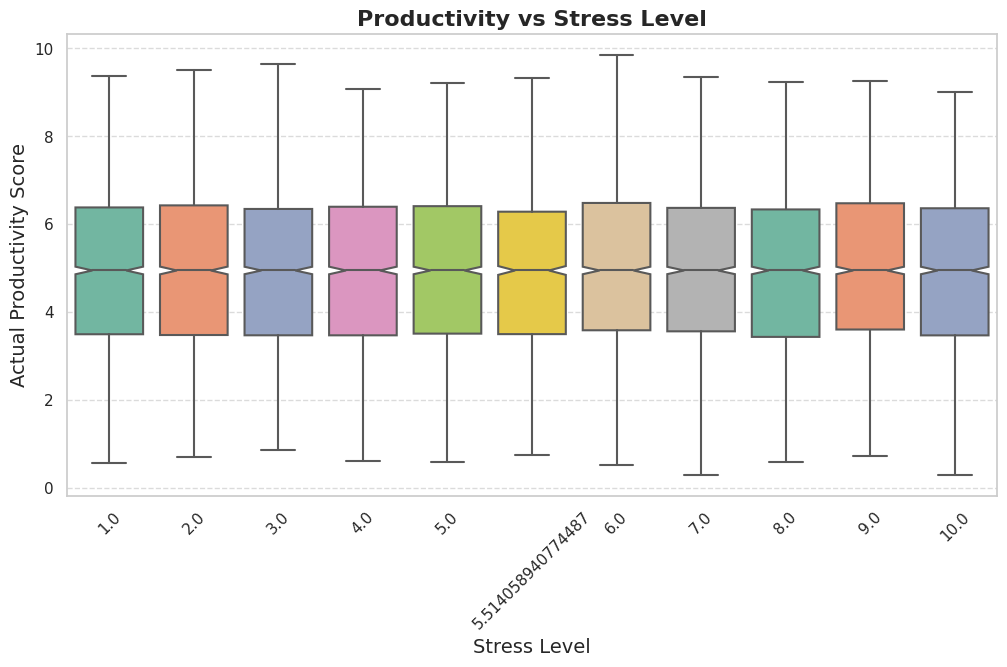

In [25]:
sns.boxplot(
    data=data,
    x='stress_level',
    y='actual_productivity_score',
    palette='Set2',
    notch=True
           )
plt.title("Productivity vs Stress Level",weight='bold')
plt.xlabel("Stress Level")
plt.ylabel("Actual Productivity Score")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## 11. Distribution of Sleep Hours

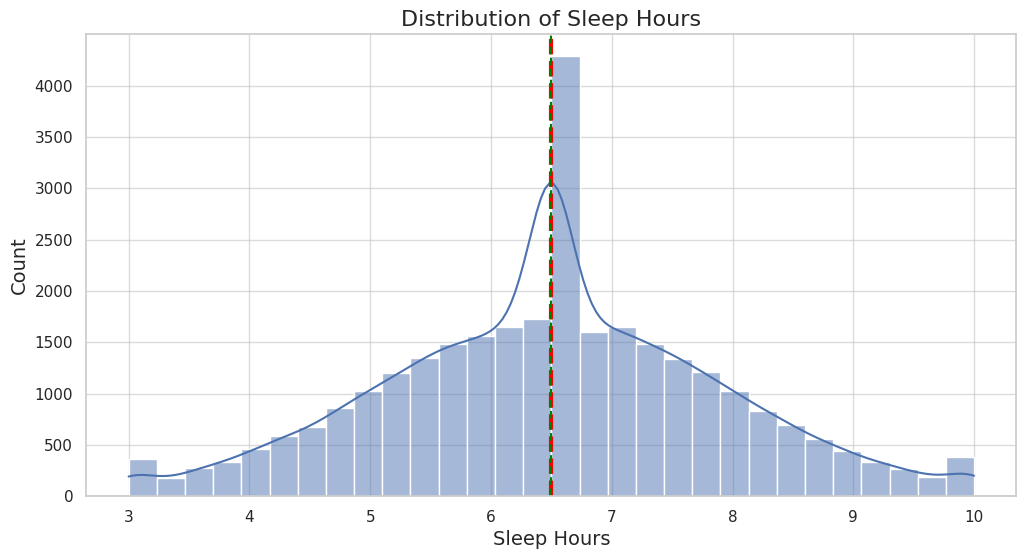

In [26]:
sns.histplot(data["sleep_hours"], bins=30, kde=True)
plt.title("Distribution of Sleep Hours")
plt.xlabel("Sleep Hours")
plt.ylabel("Count")
plt.axvline(data['sleep_hours'].mean(),color='red',linestyle='--',label="Mean",linewidth=3)
plt.axvline(data['sleep_hours'].median(),color='green',linestyle='--',label="Median")
plt.show()

## 12. Job Satisfaction Distribution and Density

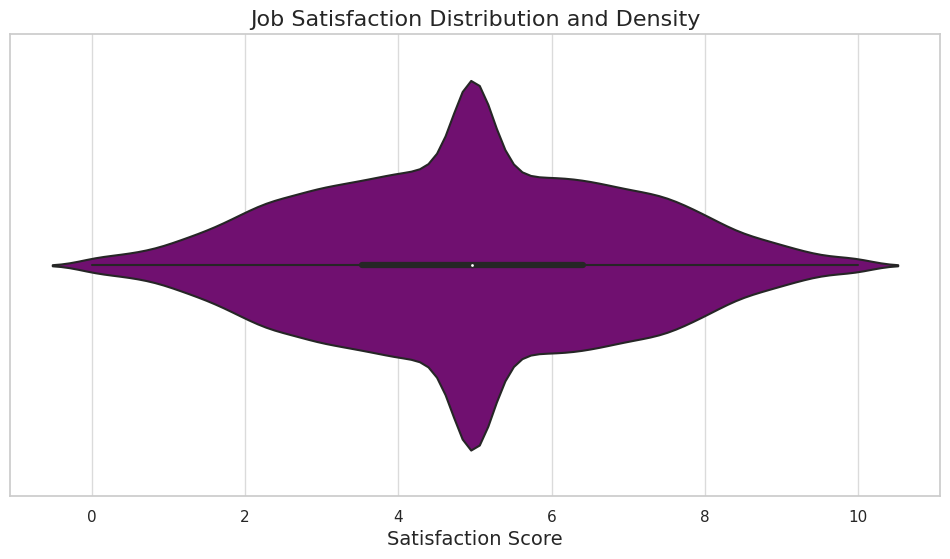

In [27]:
sns.violinplot(x=data['job_satisfaction_score'], color='purple')
plt.title('Job Satisfaction Distribution and Density')
plt.xlabel('Satisfaction Score')
plt.show()

## 13. Burnout Risk Pattern in 3D

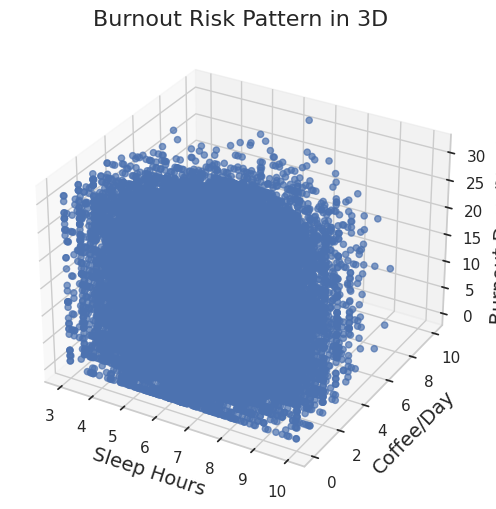

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['sleep_hours'], data['coffee_consumption_per_day'], data['days_feeling_burnout_per_month'], alpha=0.7)
ax.set_xlabel('Sleep Hours')
ax.set_ylabel('Coffee/Day')
ax.set_zlabel('Burnout Days/Month')
plt.title('Burnout Risk Pattern in 3D')
plt.show()

## 14. Burnout Days vs. Productivity Score

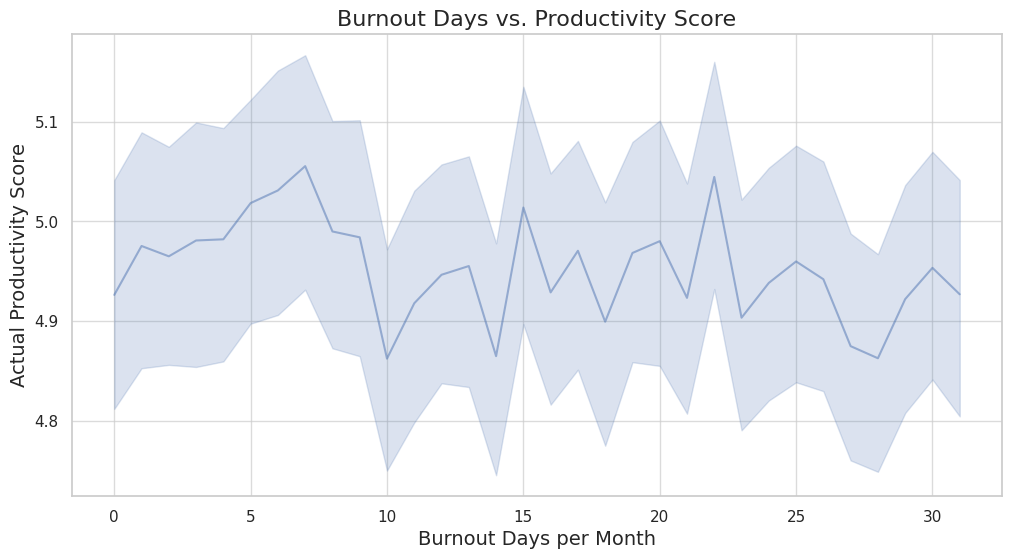

In [29]:
sns.lineplot(data=data, x="days_feeling_burnout_per_month", y="actual_productivity_score", alpha=0.5)
plt.title("Burnout Days vs. Productivity Score")
plt.xlabel("Burnout Days per Month")
plt.ylabel("Actual Productivity Score")
plt.show()

## 15. Job Satisfaction vs. Actual Productivity (Regression)

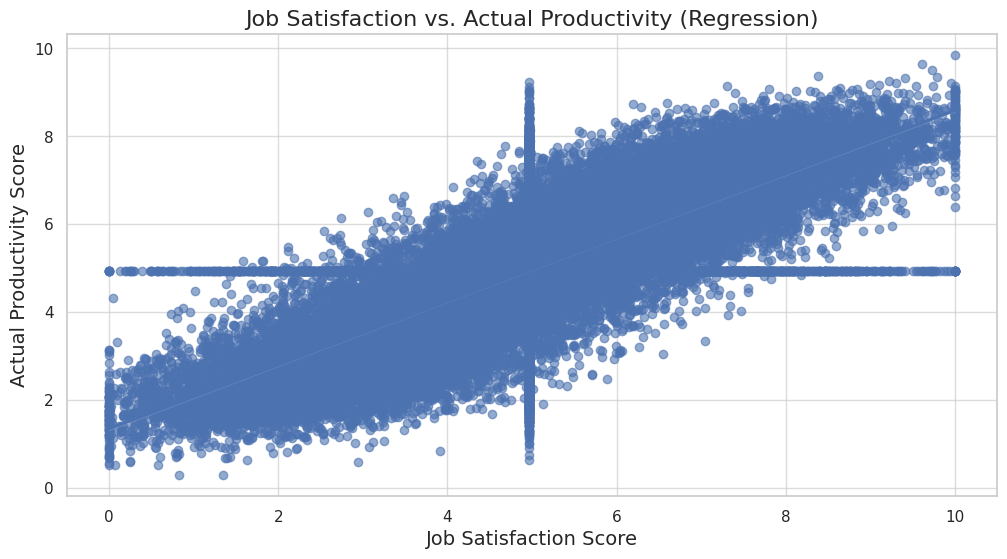

In [30]:
sns.regplot(data=data, x="job_satisfaction_score", y="actual_productivity_score", scatter_kws={"alpha":0.6})
plt.title("Job Satisfaction vs. Actual Productivity (Regression)")
plt.xlabel("Job Satisfaction Score")
plt.ylabel("Actual Productivity Score")
plt.show()

# Step 3: Advanced Feature Engineering

## 1. Productivity Gap: Difference between perceived and actual productivity

In [31]:
data["productivity_gap"] = data["perceived_productivity_score"] - data["actual_productivity_score"]

## 2. Ratio of Screen Time to Sleep

In [32]:
data["screen_sleep_ratio"] = data["screen_time_before_sleep"] / data["sleep_hours"]
data["screen_sleep_ratio"].replace([float("inf"), -float("inf")],0,inplace=True)
data['screen_sleep_ratio'].head()

0    0.081911
1    0.131570
2    0.072744
3    0.198999
4    0.347088
Name: screen_sleep_ratio, dtype: float64

## 3. Burnout per day (monthly)

In [33]:
data["burnout_per_day"] = (data["days_feeling_burnout_per_month"] / 30).round(2)
data["burnout_per_day"].head()

0    0.37
1    0.83
2    0.57
3    0.13
4    1.00
Name: burnout_per_day, dtype: float64

## 4. Coffee Consumption Ratio per Work Hour

In [34]:
data["coffee_per_hour"] = (data["coffee_consumption_per_day"] / data["work_hours_per_day"]).round(2)
data["coffee_per_hour"].head()

0    0.59
1    0.22
2    0.38
3    0.00
4    0.16
Name: coffee_per_hour, dtype: float64

## 5. Work Hours vs Coffee Consumption per Hour Segregated by Gender

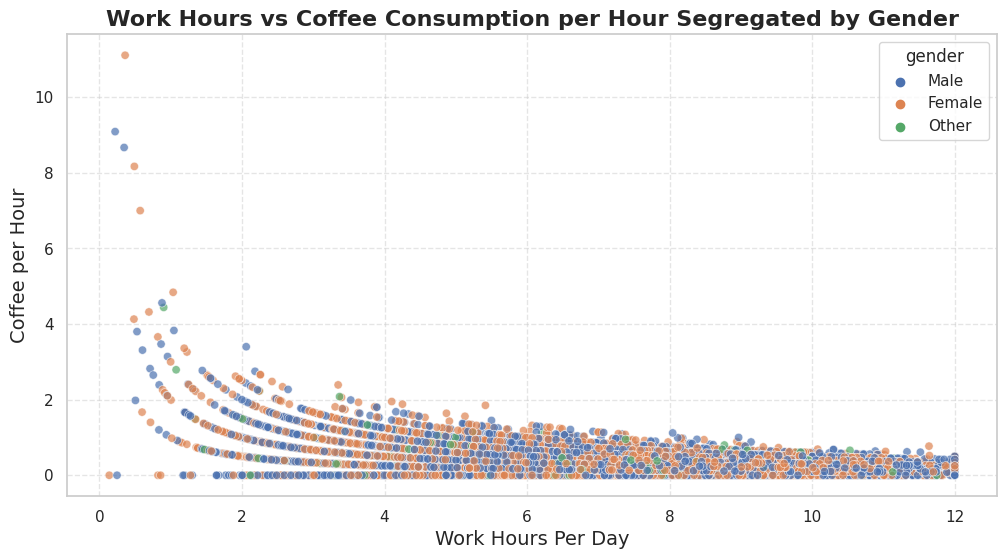

In [35]:
sns.scatterplot(
    data=data,
    x="work_hours_per_day",
    y="coffee_per_hour",
    hue="gender",
    alpha=0.7
)
plt.title("Work Hours vs Coffee Consumption per Hour Segregated by Gender", weight='bold')
plt.xlabel("Work Hours Per Day")
plt.ylabel("Coffee per Hour")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


#### Offline Time Correlates With stress, Burnout, productivity

## 6. Offline Ratio per Weekly hours

In [36]:
data["offline_ratio"] = (data["weekly_offline_hours"] / (7 * 24)).round(2)
data["offline_ratio"].head()

0    0.13
1    0.00
2    0.06
3    0.14
4    0.06
Name: offline_ratio, dtype: float64

## 7. Work Hours vs Offline Ratio Segregated by Gender(Scatter)

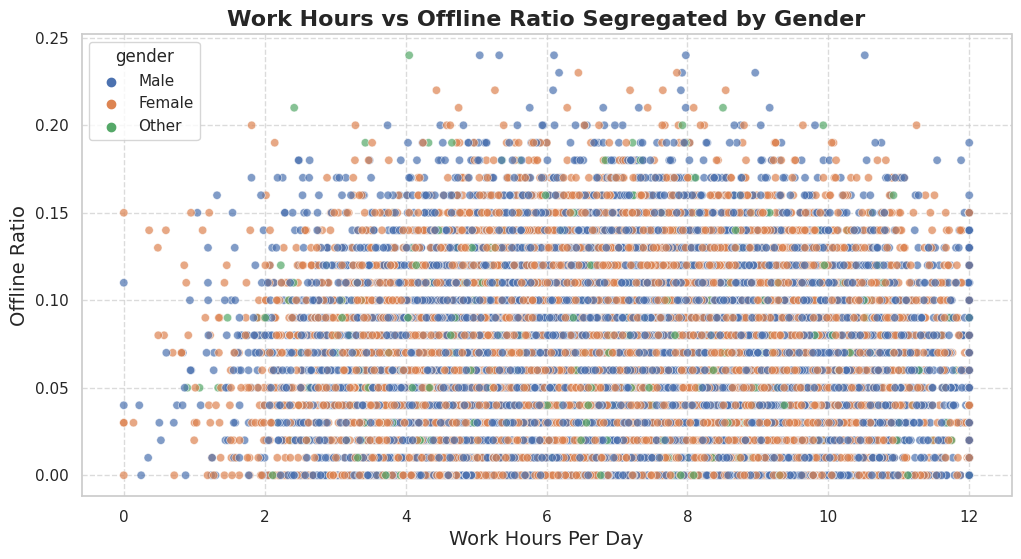

In [37]:
sns.scatterplot(
    data=data,
    x='work_hours_per_day',
    y='offline_ratio',
    hue='gender',
    alpha=0.7
)
plt.title("Work Hours vs Offline Ratio Segregated by Gender",weight='bold',fontsize=16)
plt.xlabel('Work Hours Per Day')
plt.ylabel('Offline Ratio')
plt.grid(True,linestyle='--',alpha=0.7)
plt.show()

In [38]:
data['connectivity_stress_score'] = data['stress_level'] / data['internet_speed'].replace(0, 0.1)

## 8. Connectivity Stress vs Actual Productivity

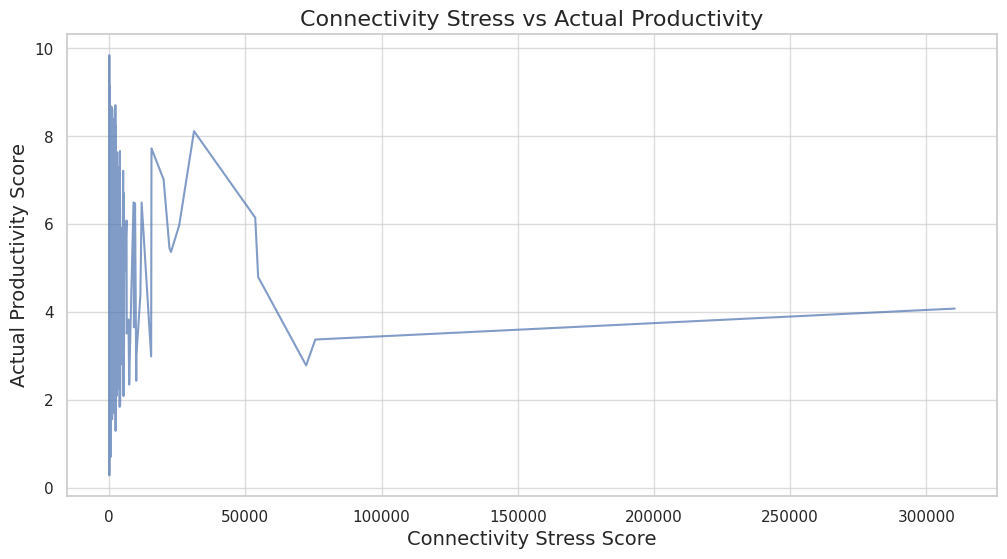

In [39]:
sns.lineplot(x='connectivity_stress_score', y='actual_productivity_score',data=data,alpha=0.7)
plt.title("Connectivity Stress vs Actual Productivity")
plt.xlabel("Connectivity Stress Score")
plt.ylabel("Actual Productivity Score")
plt.grid(True)
plt.show()


In [40]:
data['noise_level_during_work_encoded']=data['noise_level_during_work'].map({'Low':1,'Medium':2,'High':3})
data['work_distraction']=data['breaks_during_work']*data['noise_level_during_work_encoded']

# Step 4.1  Regression Modeling with Machine Learning

## 1. Split Dependent and Independent Columns

In [41]:
independents = data.drop(columns=["actual_productivity_score"])  
dependent = data["actual_productivity_score"] 

In [42]:
independents.head()

age  gender    job_type  daily_social_media_time  \
0  56.0    Male  Unemployed                 4.180940   
1  46.0    Male      Health                 3.249603   
2  32.0    Male     Finance                 3.113418   
3  60.0  Female  Unemployed                 3.113418   
4  25.0    Male          IT                 3.113418   

  social_platform_preference  number_of_notifications  work_hours_per_day  \
0                   Facebook                     61.0            6.753558   
1                    Twitter                     59.0            9.169296   
2                    Twitter                     57.0            7.910952   
3                   Facebook                     59.0            6.355027   
4                   Telegram                     66.0            6.214096   

   perceived_productivity_score  stress_level  sleep_hours  ...  \
0                      8.040464           4.0     5.116546  ...   
1                      5.063368           7.0     5.103897  ...   
2                      3.861762           4.0     8.583222  ...   
3                      2.916331           6.0     6.052984  ...   
4                      8.868753           7.0     5.405706  ...   

   internet_speed  noise_level_during_work productivity_gap  \
0        0.322988                      Low         0.748909   
1        0.512681                   Medium        -0.101725   
2        0.110751                      Low         0.387709   
3        0.765121                      Low         1.141462   
4        0.075965                      Low         3.916948   

  screen_sleep_ratio  burnout_per_day  coffee_per_hour  offline_ratio  \
0           0.081911             0.37             0.59           0.13   
1           0.131570             0.83             0.22           0.00   
2           0.072744             0.57             0.38           0.06   
3           0.198999             0.13             0.00           0.14   
4           0.347088             1.00             0.16           0.06   

   connectivity_stress_score  noise_level_during_work_encoded work_distraction  
0                  12.384365                                1              8.0  
1                  13.653704                                2             14.0  
2                  36.117094                                1              0.0  
3                   7.841900                                1              1.0  
4                  92.148188                                1              1.0  

[5 rows x 28 columns]

## 2. Convert categorical features into numerical format using one-hot encoding

In [43]:
independents = pd.get_dummies(independents, drop_first=True)
independents

age  daily_social_media_time  number_of_notifications  \
0      56.0                 4.180940                     61.0   
1      46.0                 3.249603                     59.0   
2      32.0                 3.113418                     57.0   
3      60.0                 3.113418                     59.0   
4      25.0                 3.113418                     66.0   
...     ...                      ...                      ...   
29995  34.0                 1.877297                     59.0   
29996  39.0                 4.437784                     46.0   
29997  42.0                17.724981                     64.0   
29998  20.0                 3.796634                     56.0   
29999  44.0                 3.113418                     70.0   

       work_hours_per_day  perceived_productivity_score  stress_level  \
0                6.753558                      8.040464           4.0   
1                9.169296                      5.063368           7.0   
2                7.910952                      3.861762           4.0   
3                6.355027                      2.916331           6.0   
4                6.214096                      8.868753           7.0   
...                   ...                           ...           ...   
29995           10.226358                      3.348512           8.0   
29996            4.692862                      8.133213           8.0   
29997           10.915036                      8.611005           5.0   
29998            6.937410                      7.767076           8.0   
29999            8.069883                      6.311227           3.0   

       sleep_hours  screen_time_before_sleep  breaks_during_work  \
0         5.116546                  0.419102                 8.0   
1         5.103897                  0.671519                 7.0   
2         8.583222                  0.624378                 0.0   
3         6.052984                  1.204540                 1.0   
4         5.405706                  1.876254                 1.0   
...            ...                       ...                 ...   
29995     5.480462                  1.412655                 9.0   
29996     3.045393                  0.148936                 3.0   
29997     5.491520                  1.224296                10.0   
29998     6.816069                  0.234483                 1.0   
29999     6.765248                  0.993090                 5.0   

       coffee_consumption_per_day  ...  job_type_Student  job_type_Unemployed  \
0                             4.0  ...             False                 True   
1                             2.0  ...             False                False   
2                             3.0  ...             False                False   
3                             0.0  ...             False                 True   
4                             1.0  ...             False                False   
...                           ...  ...               ...                  ...   
29995                         4.0  ...             False                False   
29996                         1.0  ...             False                False   
29997                         1.0  ...             False                False   
29998                         2.0  ...             False                False   
29999                         1.0  ...             False                 True   

       social_platform_preference_Instagram  \
0                                     False   
1                                     False   
2                                     False   
3                                     False   
4                                     False   
...                                     ...   
29995                                 False   
29996                                  True   
29997                                 False   
29998                                  True   
29999                                 False

## 3. Check NaN and Infs values Count

In [44]:
def is_nan_and_infs():
    print("NaNs:", independents.isna().sum().sum())
    print("Infs:", np.isinf(independents).sum().sum())
    print("NaNs:", dependent.isna().sum().sum())
    print("Infs:", np.isinf(dependent).sum().sum())
is_nan_and_infs()

NaNs: 0
Infs: 6
NaNs: 0
Infs: 0


## 4. Replace Infinite values with Mean

In [45]:
dependent.replace([np.inf, -np.inf], np.nan, inplace=True)
dependent.fillna(dependent.mean(), inplace=True)
independents.replace([np.inf, -np.inf], np.nan, inplace=True)
independents.fillna(independents.mean(), inplace=True)

In [69]:
processed_data = independents.copy()
processed_data['Target'] = dependent 
processed_data.to_csv('processed_data.csv', index=False)
import os
os.makedirs('processed_data', exist_ok=True)
final_data.to_csv('/processed_data.csv', index=False)

In [70]:
os.getcwd()

'/kaggle/working'

In [46]:
is_nan_and_infs()

NaNs: 0
Infs: 0
NaNs: 0
Infs: 0


## 5. Train & Test Split

In [47]:
x_train,x_test,dev_train,dev_test=train_test_split(independents,dependent,test_size=0.2,random_state=512)

## 6. Feature Scaling

In [48]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

## 7. Models Initialization

In [49]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01),
    "CatBoost": CatBoostRegressor(iterations=500,learning_rate=0.05,depth=6,random_state=512,verbose=0,early_stopping_rounds=43),
    "ElasticNet": ElasticNet(alpha=0.01, l1_ratio=0.5),
    "Decision Tree": DecisionTreeRegressor(max_depth=10, min_samples_split=10, random_state=512),
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=15, random_state=512),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=150, learning_rate=0.05, max_depth=5, random_state=512),
    "AdaBoost": AdaBoostRegressor(n_estimators=100, learning_rate=0.8, random_state=512),
    "Support Vector Regressor": SVR(kernel='rbf', C=10, epsilon=0.1),
    "XGBoost": XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=6, random_state=512),
}

model_results = []


## 8. Train and Evaluate Models

In [50]:
for model_name,model in models.items():
    start_time = time.time()
    model.fit(x_train_scaled, dev_train)
    end_time = time.time()
    #prediction w.r.t scaled Features
    dev_pred = model.predict(x_test_scaled)
    
    mse = mean_squared_error(dev_test, dev_pred)
    mae = mean_absolute_error(dev_test, dev_pred)
    r2 = r2_score(dev_test, dev_pred)
    duration_time = round(end_time - start_time, 2)
    
    model_results.append({
        "Model Name": model_name,
        "R2 Score": round(r2, 2),
        "MAE": round(mae, 2),
        "MSE": round(mse, 2),
        "Train Time (s)": duration_time
    })

## 9. Performance Summary Data Frame

In [51]:
model_results_dataframe=pd.DataFrame(model_results).sort_values(
by=["R2 Score"],ascending=False)
print("\033[1mEach Model Performance\033[0m")
model_results_dataframe

Each Model Performance


Model Name  R2 Score   MAE   MSE  Train Time (s)
0          Linear Regression      1.00  0.00  0.00            0.09
1           Ridge Regression      1.00  0.00  0.00            0.02
2           Lasso Regression      1.00  0.01  0.00            0.04
3                   CatBoost      1.00  0.02  0.00            2.65
4                 ElasticNet      1.00  0.02  0.00            0.03
5              Decision Tree      1.00  0.06  0.01            0.46
6              Random Forest      1.00  0.01  0.00           38.92
7          Gradient Boosting      1.00  0.02  0.00           34.92
10                   XGBoost      1.00  0.02  0.00            0.99
9   Support Vector Regressor      0.99  0.09  0.02          103.66
8                   AdaBoost      0.94  0.35  0.19           10.42

# Step 4.2: Neural Network Regression using Keras

In [52]:
from keras.layers import Input
model = Sequential()
model.add(Input(shape=(x_train_scaled.shape[1],)))

model.add(Dense(128))
model.add(LeakyReLU(negative_slope=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(64))
model.add(LeakyReLU(negative_slope=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(32))
model.add(LeakyReLU(negative_slope=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(16))
model.add(LeakyReLU(negative_slope=0.1))
model.add(Dropout(0.1))

model.add(Dense(1, activation='linear'))

2025-06-28 16:51:05.081014: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


## Model Compilation

In [53]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mae'])
early_stop = EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)

## Model Training

In [54]:
fit_results=model.fit(
    x_train_scaled, dev_train,
    validation_split=0.2,
    epochs=64,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/64
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 9.4827 - mae: 2.4165 - val_loss: 0.3651 - val_mae: 0.4833
Epoch 2/64
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.7495 - mae: 1.0360 - val_loss: 0.1889 - val_mae: 0.3502
Epoch 3/64
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.2755 - mae: 0.8810 - val_loss: 0.1494 - val_mae: 0.3157
Epoch 4/64
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.9355 - mae: 0.7487 - val_loss: 0.0888 - val_mae: 0.2438
Epoch 5/64
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.7953 - mae: 0.6925 - val_loss: 0.0724 - val_mae: 0.2100
Epoch 6/64
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.6639 - mae: 0.6300 - val_loss: 0.0720 - val_mae: 0.2126
Epoch 7/64
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5809 - mae: 0.5912 - val_loss: 0.0662 - val_mae: 0.2148
Epoch 8/64
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5184 - mae: 0.5590 - val_loss: 0.0903 - val_mae: 0.2549
Epoch 9/64
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - lo

##  Training History Plot 

## Training vs Validation MAE per Epoch

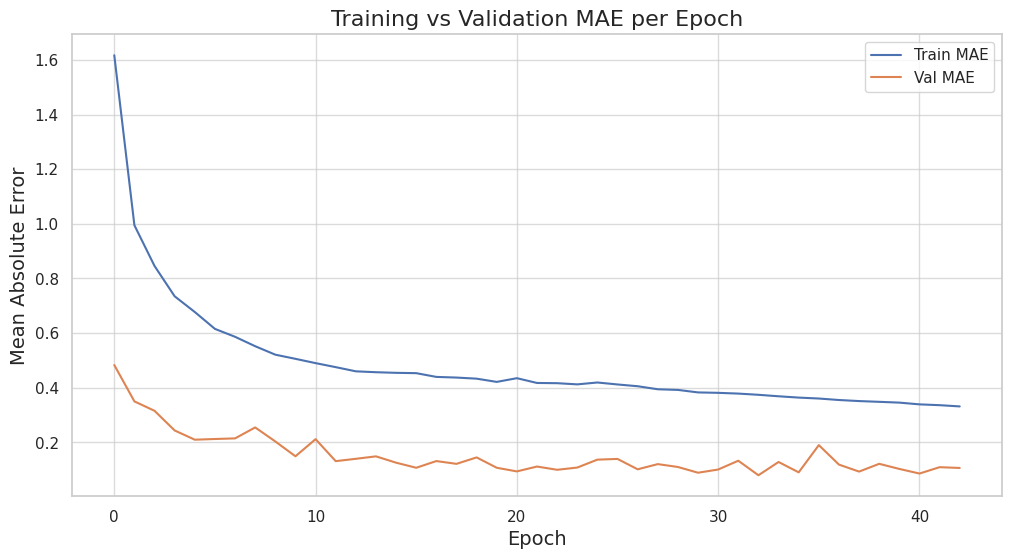

In [55]:
plt.plot(fit_results.history['mae'], label='Train MAE')
plt.plot(fit_results.history['val_mae'], label='Val MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.title('Training vs Validation MAE per Epoch')
plt.legend()
plt.grid(True)
plt.show()


## Loss over Epochs

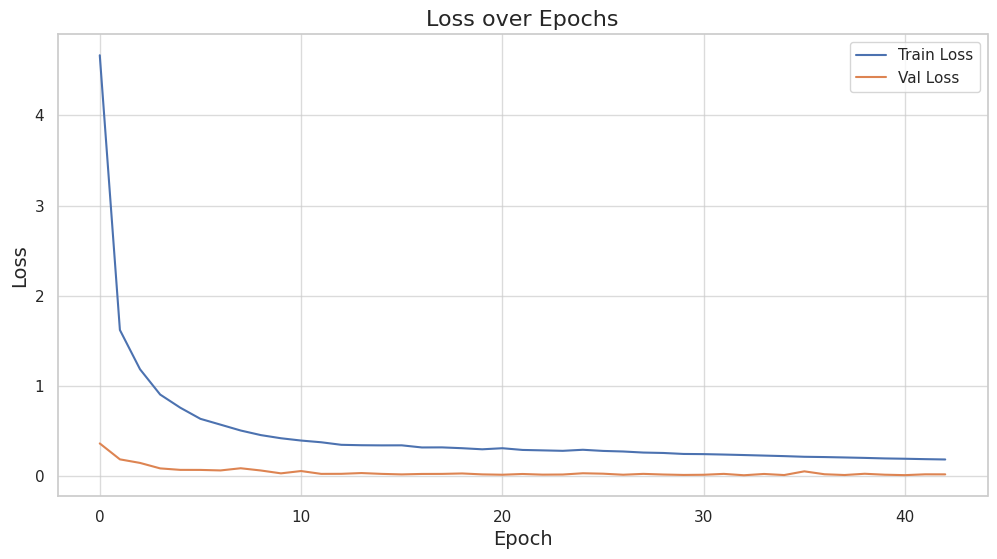

In [56]:
plt.plot(fit_results.history['loss'], label='Train Loss')
plt.plot(fit_results.history['val_loss'], label='Val Loss')
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

##  Model Evaluation

In [57]:
loss, mae = model.evaluate(x_test_scaled, dev_test, verbose=0)
print(f"Test MSE:{loss:.3f}")
print(f"Test MAE:{mae:.3f}")

Test MSE:0.019
Test MAE:0.080


# Step 5: Final Model Comparison (ML vs DL)

## 1. Deep Learning predictions and metrics

In [58]:
predictions=model.predict(x_test_scaled).flatten()
r2_score_dl=r2_score(dev_test, predictions)
mse_dl,mae_dl=model.evaluate(x_test_scaled,dev_test, verbose=0)
training_duration=len(fit_results.epoch) * 1.3

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


## 2. Actual vs Predicted (Scatter)

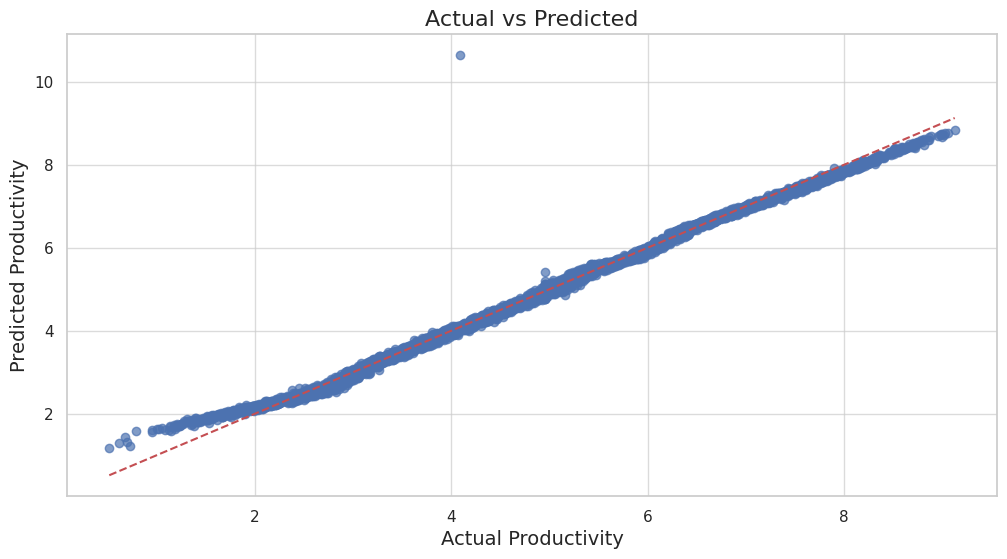

In [59]:
plt.scatter(dev_test, predictions, alpha=0.7)
plt.xlabel("Actual Productivity")
plt.ylabel("Predicted Productivity")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.plot([min(dev_test), max(dev_test)],[min(dev_test),max(dev_test)], 'r--')
plt.show()


## 3. Concatinating DL results with ML results Data Frame

In [60]:
model_results=pd.concat([model_results_dataframe,pd.DataFrame(
    [
    {
    "Model Name": "Deep Learning (FNN)",
    "R2 Score": round(r2_score_dl, 2),
    "MAE": round(mae_dl, 2),
    "MSE": round(mse_dl, 2),
    "Train Time (s)": round(training_duration, 2)
    }
])],ignore_index=True)
model_results=model_results.sort_values(by='R2 Score',ascending=False)
model_results

Model Name  R2 Score   MAE   MSE  Train Time (s)
0          Linear Regression      1.00  0.00  0.00            0.09
1           Ridge Regression      1.00  0.00  0.00            0.02
2           Lasso Regression      1.00  0.01  0.00            0.04
3                   CatBoost      1.00  0.02  0.00            2.65
4                 ElasticNet      1.00  0.02  0.00            0.03
5              Decision Tree      1.00  0.06  0.01            0.46
6              Random Forest      1.00  0.01  0.00           38.92
7          Gradient Boosting      1.00  0.02  0.00           34.92
8                    XGBoost      1.00  0.02  0.00            0.99
9   Support Vector Regressor      0.99  0.09  0.02          103.66
11       Deep Learning (FNN)      0.99  0.08  0.02           55.90
10                  AdaBoost      0.94  0.35  0.19           10.42

## 4. Residuals vs Predicted (Deep Learning FFN)

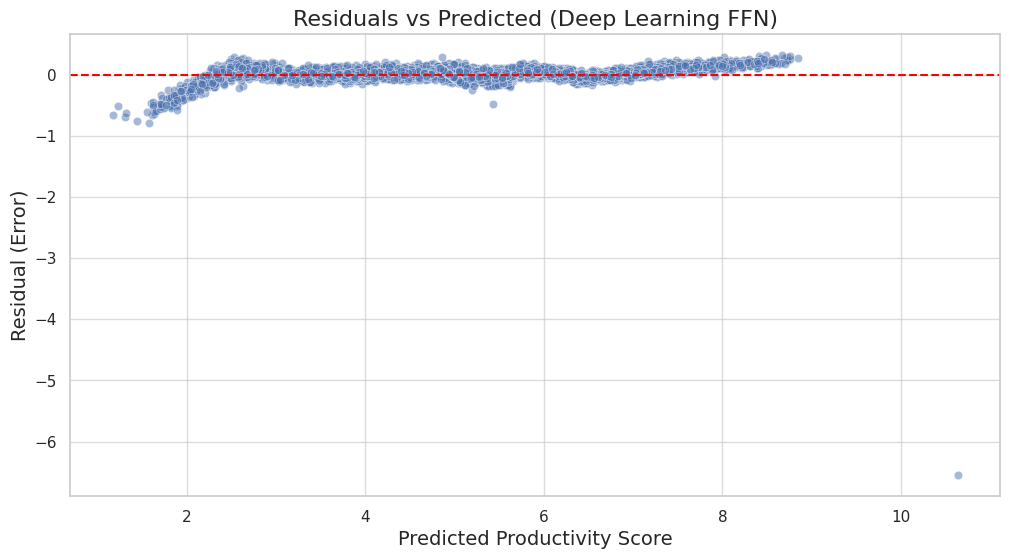

In [61]:
sns.scatterplot(x=predictions, y=(dev_test-predictions), alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Productivity Score")
plt.ylabel("Residual (Error)")
plt.title("Residuals vs Predicted (Deep Learning FFN)")
plt.grid(True)
plt.show()

## 5. Distribution of Prediction Errors in FFN

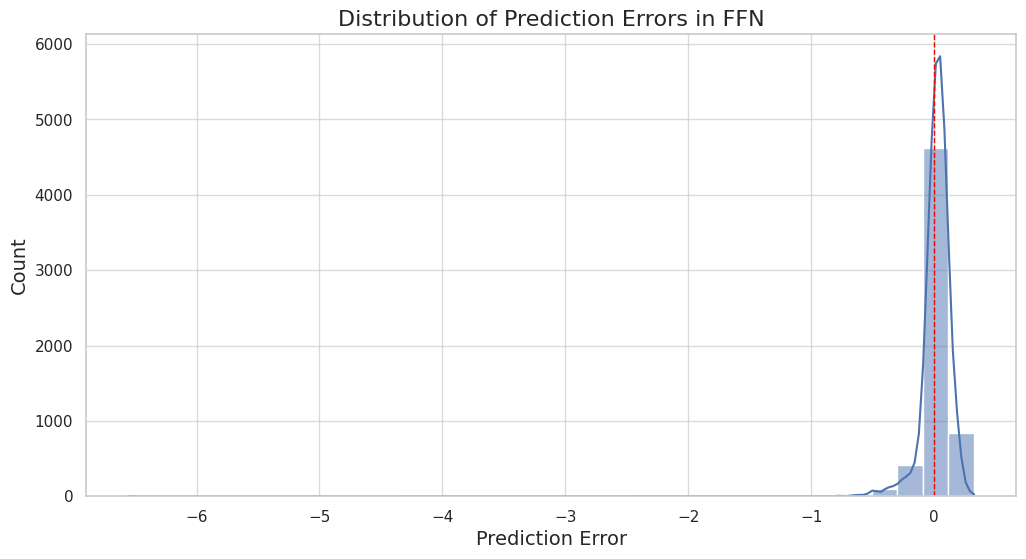

In [62]:
sns.histplot(dev_test-predictions,bins=33,kde=True)
plt.xlabel("Prediction Error")
plt.title('Distribution of Prediction Errors in FFN')
plt.axvline(0, color='red',linestyle='--',linewidth=1)
plt.grid(True)
plt.show()

# Step 7: Feature Importance Analysis

#### Use trained XGBRegressor model From ML models (R2 Score=1.00,MAE=0.02,MSE=0.00)	

In [63]:
model=models['XGBoost']
model.fit(x_train_scaled,dev_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=512, ...)

In [64]:
feature_names=independents.columns
feature_names

Index(['age', 'daily_social_media_time', 'number_of_notifications',
       'work_hours_per_day', 'perceived_productivity_score', 'stress_level',
       'sleep_hours', 'screen_time_before_sleep', 'breaks_during_work',
       'coffee_consumption_per_day', 'days_feeling_burnout_per_month',
       'weekly_offline_hours', 'job_satisfaction_score', 'internet_speed',
       'productivity_gap', 'screen_sleep_ratio', 'burnout_per_day',
       'coffee_per_hour', 'offline_ratio', 'connectivity_stress_score',
       'noise_level_during_work_encoded', 'work_distraction', 'gender_Male',
       'gender_Other', 'job_type_Finance', 'job_type_Health', 'job_type_IT',
       'job_type_Student', 'job_type_Unemployed',
       'social_platform_preference_Instagram',
       'social_platform_preference_Telegram',
       'social_platform_preference_TikTok',
       'social_platform_preference_Twitter', 'uses_focus_apps_True',
       'has_digital_wellbeing_enabled_True', 'noise_level_during_work_Low',
       'noi

 ## Feature importances(Top 10 Features)

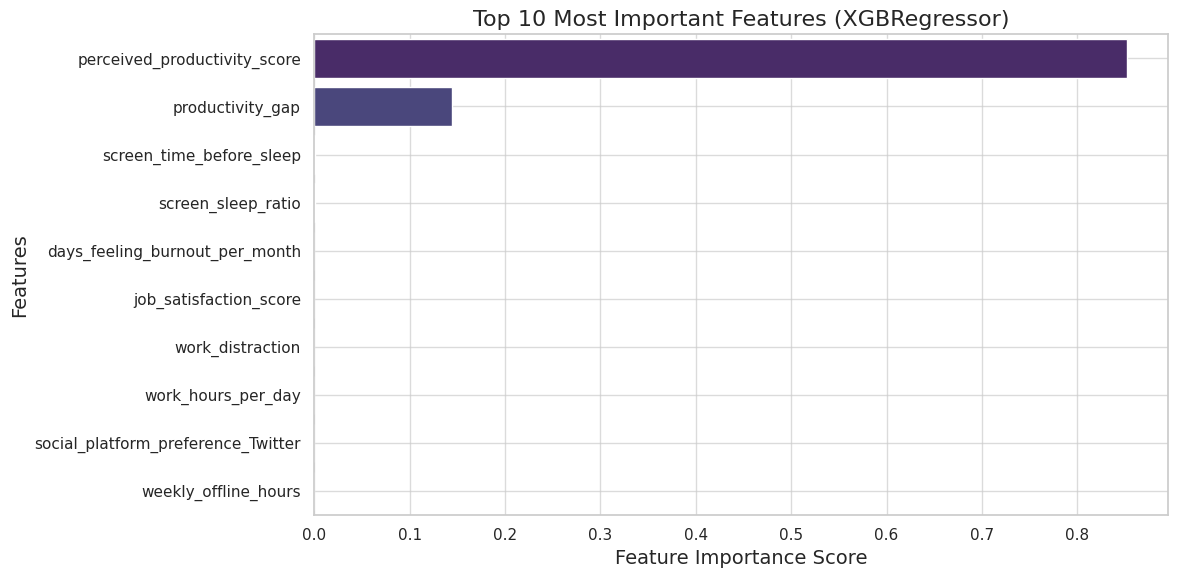

In [65]:
importances = model.feature_importances_
feature_importance_df= pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False).head(10)
sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette="viridis")
plt.title("Top 10 Most Important Features (XGBRegressor)")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 8: Lime – Model Explanation (Explainable AI)

In [66]:
pip install lime

Note: you may need to restart the kernel to use updated packages.


## Train a new tree-based model for Lime and Initialize Lime explainer

In [67]:
import lime
import lime.lime_tabular
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(x_train),
    feature_names=independents.columns,
    mode='regression'
)
i=0
exp = explainer.explain_instance(
    data_row=x_test.iloc[i],
    predict_fn=model.predict,
    num_features=10
)

## Summary plot (Feature Importance)

In [68]:
exp.show_in_notebook(show_table=True)

##  Final Summary & Project Review

---

##  Project Workflow:

1. **Data Cleaning & Imputation**
   - Handled missing and infinite values using mean imputation.
   - Ensured all features were numeric and suitable for model training.

2. **Exploratory Data Analysis (EDA)**
   - Visualized key relationships:
     - Social media time vs. productivity
     - Stress, sleep, burnout vs. actual productivity
   - Used histograms, boxplots, and heatmaps to uncover trends.

3. **Feature Engineering**
   - Created new insightful features:
     - `productivity_gap = perceived_productivity_score - actual_productivity_score`
     - `screen_sleep_ratio = screen_time_before_sleep / sleep_hours`
     - `offline_ratio = weekly_offline_hours / (168 - total_work_and_sleep_hours)`
   - Applied one-hot encoding for categorical variables to make them model-ready.

4A. **Machine Learning Models (11 Regressors)**
   - Trained and evaluated:
     - **Linear Models**: Linear, Ridge, Lasso, ElasticNet
     - **Tree-Based**: Decision Tree, Random Forest
     - **Boosting Models**: Gradient Boosting, AdaBoost, XGBoost, CatBoost
     - **Others**: Support Vector Regressor (SVR)
   - Evaluation Metrics:
     - R² Score, MAE, MSE, Training Time

4B. **Deep Learning Regression (Keras)**
   - Built a dense neural network with:
     - Layers: Dense + BatchNormalization + LeakyReLU + Dropout
     - Optimizer: Adam | Loss: MSE
     - EarlyStopping to prevent overfitting
   - Visualized training loss and MAE per epoch.

5. **Train-Test Split**
   - Used `train_test_split()` and `StandardScaler` to normalize and prepare data.

6. **Model Performance Comparison**
   - Compiled all model scores into a comparative table.
   - Ranked based on R² Score to select top-performing models.

7. **Feature Importance (XGBoost)**
   - Extracted and visualized the top 9 most impactful features using `feature_importances_`.

8. **Model Explainability (LIME – Explainable AI)**
   - Trained a tree-based model for interpretability.
   - Applied **LIME (Local Interpretable Model-agnostic Explanations)** to explain individual predictions.
   - Used `LimeTabularExplainer` to identify the top 10 contributing features for a single test instance.
   - Displayed interactive explanation using `exp.show_in_notebook()`.

---

###  Key Takeaways

- **Behavioral Drivers**:
  - Higher **daily social media time**, **stress levels**, and **screen time before sleep** were negatively associated with actual productivity.
  - **Use of focus apps**, **offline hours**, and **job satisfaction** showed strong positive correlations with productivity.

- **Model Insights**:
  - **XGBoost** and **Random Forest** delivered the highest R² scores and most reliable predictions.
  - **Deep Learning** performed competitively after tuning, especially on nonlinear patterns,slightly less optimal than XGBoost/CatBoost for this dataset size (likely due to lower noise and well-behaved features).
  - **Feature Engineering** significantly improved signal quality for the models.

- **Interpretability Achieved**:
  - **LIME** enabled instance-level transparency, helping us understand why specific predictions were made — essential for decision trust.

---

### Final Verdict:
This project demonstrates how explainable machine learning can be used to **quantify, predict, and demystify productivity influencers** in a digitally distracted world. It blends performance with transparency — making it both **impactful and actionable**.
